In [1]:
% run RasMMA_Classification_MatchReader_Module.ipynb

### Read testing score box and check match or not

In [2]:
modelBaseDir = "output/top3_party_0622/"
resultDir = "output/testingResult/top3_test/global_align/"

ignoreFamilys, weight_dict = readModelFiles(modelBaseDir)
baseScoreBox = createScoreBox(resultDir, ignoreFamilys, weight_dict)

myDB = 'data/top3_test/'
testFamilies = os.listdir(myDB)
truth_dict = dict()
for famName in testFamilies:
    famPath = myDB + famName + '/'
    for trace in os.listdir(famPath):
        shaName = trace[0:6]
        truth_dict[shaName] = famName
        
scoreBox_withTruth = assignGroundTruth(baseScoreBox, truth_dict)

# matchMethod='Exact_Match' and 'Effective_Match'
matchResultTable = getMatchResult(scoreBox_withTruth, threshold=0.8, matchMethod='Effective_Match')

matchTypeStatistic = matchResultTable['MatchType'].value_counts()
matchCtr = matchTypeStatistic['Match']
mismatchCtr = matchTypeStatistic['Mismatch']
undecidedCtr = matchTypeStatistic['Undecided']
totalSamples = matchCtr + mismatchCtr + undecidedCtr
print(matchTypeStatistic)
print("Match Rate:", matchCtr/totalSamples)
matchResultTable

=== Finish building model ===
Match        153
Mismatch      31
Undecided     28
Name: MatchType, dtype: int64
Match Rate: 0.721698113208


,MatchType,PredictFamily,GroundTruth,MaxScore,TruthScore
003777,Match,allaple,allaple,1.00,1.00
04300b,Match,allaple,allaple,1.00,1.00
047252,Match,allaple,allaple,1.00,1.00
0e965d,Match,allaple,allaple,1.00,1.00
1c877d,Match,allaple,allaple,1.00,1.00
20bb7e,Match,allaple,allaple,1.00,1.00
31260c,Match,allaple,allaple,1.00,1.00
329d35,Match,allaple,allaple,1.00,1.00
3b6bfd,Match,allaple,allaple,1.00,1.00
3bda35,Match,allaple,allaple,1.00,1.00


### Write the Scorebox into Excel file
write the baseScorebox table into excel for read.

In [3]:
excelDir = 'report/classify_result/'
if not os.path.isdir(excelDir): os.makedirs(excelDir)
reportFileName = excelDir + 'top3_testing_28family_scorebox.xlsx'
wb = Workbook()

sheet = wb.active

otherTitleName = ['sha256','Process','GroundTruth','TruthScore','PredictFamily','MaxScore']
titleRow = otherTitleName + baseScoreBox.columns.tolist()
sheet.append(titleRow)

for proc, row in baseScoreBox.iterrows():
    sampleName = proc.split('_')[0]
    matchResultInfo = matchResultTable.loc[sampleName]
    
    truthFamily = matchResultInfo['GroundTruth']
    truthScore = getProcessTruthScore(row, truthFamily)
    predictFamily = matchResultInfo['PredictFamily']
    maxScore = getProcessMaxScore(row, truthFamily)
    
    excelRow = []
    excelRow.extend([sampleName, proc, truthFamily, truthScore, predictFamily, maxScore])
    for col in row:
        excelRow.append(str(col))
    sheet.append(excelRow)

wb.save(reportFileName)

### Create Confusion Matrix and Do Evaluation
##### Calculate 'Precision', 'Recall', and 'F1'

In [4]:
evaTable, precisions, recalls, fs, family_confusion = evaluationMethodCalculate(matchResultTable)
print(evaTable.shape)
evaTable

(28, 3)


,Precision,Recall,F1
allaple,0.74,0.96,0.83
almanahe,1.00,1.00,1.00
berbew,0.00,0.00,0.00
chir,1.00,0.33,0.50
eggnog,0.80,0.80,0.80
elkern,1.00,0.80,0.89
expiro,1.00,0.71,0.83
fakeav,0.78,0.70,0.74
fesber,0.00,0.00,0.00
ipamor,1.00,1.00,1.00


In [5]:
def averOfList(myList):
    mySum = 0
    for l in myList:
        mySum += float(l)
    return mySum/len(myList)

aver_precision = averOfList(precisions)
aver_recall = averOfList(recalls)
aver_f1 = averOfList(fs)
print("Average Precision:", aver_precision)
print("Average Recall:", aver_recall)
print("Average F1:", aver_f1)

Average Precision: 0.8078571428571429
Average Recall: 0.6307142857142857
Average F1: 0.6907142857142858


### Draw the Precision/Recall/F1 of each family

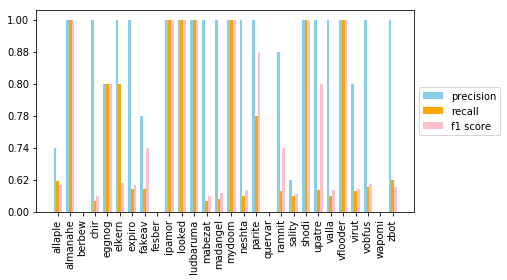

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Draw the visualization graph for precision/recall/f1
families = sorted(family_confusion.keys())
barWidth = 0.9

# x positions
x=[]
x1=[]
x2=[]
for i in range(len(families)):
    a = i*3
    x.append(i+a)
    x1.append(i+a+1*barWidth)
    x2.append(i+a+2*barWidth)

# y positions
y = precisions ## precisions
y1 = recalls # recall
y2 = fs # F1 score

plt.bar(x, y, color='skyblue', width = barWidth, label='precision')
plt.bar(x1, y1, color='orange', width = barWidth, label='recall')
plt.bar(x2, y2, color='pink', width = barWidth, label='f1 score')

# for i in range(len(x)):
#     plt.text(x=x[i]-0.5, y=y[i], s=y[i], rotation=20, fontsize=8)
#     plt.text(x=x1[i]-0.5, y=y1[i], s=y1[i], rotation=20, fontsize=8)
#     plt.text(x=x2[i]-0.5, y=y2[i], s=y2[i], rotation=20, fontsize=8)

labels = families
plt.xticks(x1, labels, rotation='vertical')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
threshold=0.8
plt.savefig('report/classify_result/EffectiveMatch_'+str(threshold)+'.png', dpi=300, bbox_inches='tight')